In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr 
import scipy.stats as stats
from sklearn import linear_model
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [149]:
data = pd.read_csv('bitcoin_dataset.csv.txt')
data1 = data.copy()

In [150]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [153]:
data.btc_market_price[1023]

13.6888

In [154]:
data

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.00000,2043200.0,0.000000e+00,0.000000e+00,0.0000,0.000235,0,1.000000,0.000000,...,31.781022,0.000000,241,244,41240,244,244,65173.130,36500.0000,0.000000e+00
1,2/18/2010,0.00000,2054650.0,0.000000e+00,0.000000e+00,0.0000,0.000241,0,1.000000,0.000000,...,154.463801,0.000000,234,235,41475,235,235,18911.740,7413.0000,0.000000e+00
2,2/19/2010,0.00000,2063600.0,0.000000e+00,0.000000e+00,0.0000,0.000228,0,1.000000,0.000000,...,1278.516635,0.000000,185,183,41658,183,183,9749.980,700.0000,0.000000e+00
3,2/20/2010,0.00000,2074700.0,0.000000e+00,0.000000e+00,0.0000,0.000218,0,1.000000,0.000000,...,22186.687990,0.000000,224,224,41882,224,224,11150.030,50.0000,0.000000e+00
4,2/21/2010,0.00000,2085400.0,0.000000e+00,0.000000e+00,0.0000,0.000234,0,1.000000,0.000000,...,689.179876,0.000000,218,218,42100,218,218,12266.830,1553.0000,0.000000e+00
5,2/22/2010,0.00000,2098150.0,0.000000e+00,0.000000e+00,0.0000,0.000384,0,1.000000,0.000000,...,65.214056,0.000000,262,261,42361,261,261,32350.000,19551.0000,0.000000e+00
6,2/23/2010,0.00000,2110700.0,0.000000e+00,0.000000e+00,0.0000,0.000216,0,1.000000,0.000000,...,25100.000000,0.000000,252,252,42613,252,252,12600.000,50.0000,0.000000e+00
7,2/24/2010,0.00000,2120200.0,0.000000e+00,0.000000e+00,0.0000,0.000282,0,1.000000,0.000000,...,179.245283,0.000000,195,196,42809,196,196,14800.000,5300.0000,0.000000e+00
8,2/25/2010,0.00000,2127600.0,0.000000e+00,0.000000e+00,0.0000,0.000227,0,1.000000,0.000000,...,1057.142857,0.000000,150,150,42959,150,150,8100.000,700.0000,0.000000e+00
9,2/26/2010,0.00000,2136100.0,0.000000e+00,0.000000e+00,0.0000,0.000319,0,1.000000,0.000000,...,64.582059,0.000000,176,176,43135,176,176,29349.000,13162.0000,0.000000e+00


In [155]:
data.btc_market_price[2876]

15005.85667

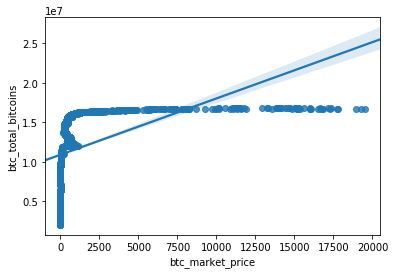

In [156]:
sns.regplot(x=data['btc_market_price'],y=data['btc_total_bitcoins'])

In [157]:
df1 = data['btc_market_price']
df2 = data['btc_total_bitcoins']
corr, _ = pearsonr(df1,df2)
print('Pearsons correlation: %.3f'% corr) 

ValueError: array must not contain infs or NaNs

In [158]:
data.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [159]:
data1.describe

<bound method NDFrame.describe of            Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0     2/17/2010           0.00000           2043200.0    0.000000e+00   
1     2/18/2010           0.00000           2054650.0    0.000000e+00   
2     2/19/2010           0.00000           2063600.0    0.000000e+00   
3     2/20/2010           0.00000           2074700.0    0.000000e+00   
4     2/21/2010           0.00000           2085400.0    0.000000e+00   
5     2/22/2010           0.00000           2098150.0    0.000000e+00   
6     2/23/2010           0.00000           2110700.0    0.000000e+00   
7     2/24/2010           0.00000           2120200.0    0.000000e+00   
8     2/25/2010           0.00000           2127600.0    0.000000e+00   
9     2/26/2010           0.00000           2136100.0    0.000000e+00   
10    2/27/2010           0.00000           2144750.0    0.000000e+00   
11    2/28/2010           0.00000           2152850.0    0.000000e+00   
12     3/1/2010  

C:\Users\E.Manish\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


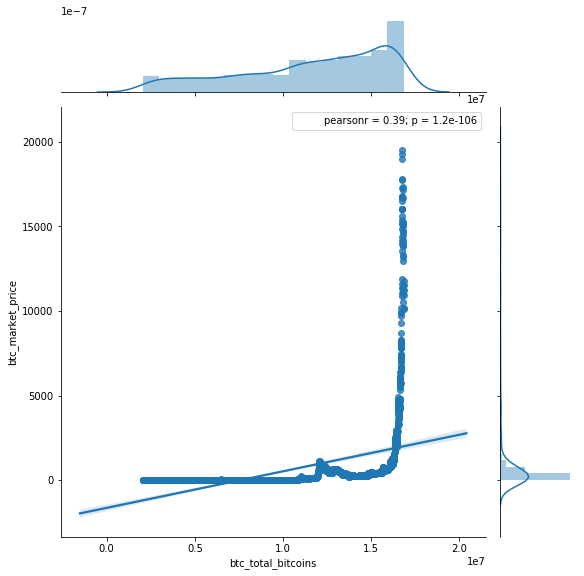

In [160]:
j=sns.jointplot(x='btc_total_bitcoins',y='btc_market_price',kind="reg",data=data,height=8)
j.annotate(stats.pearsonr)
plt.show()

C:\Users\E.Manish\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


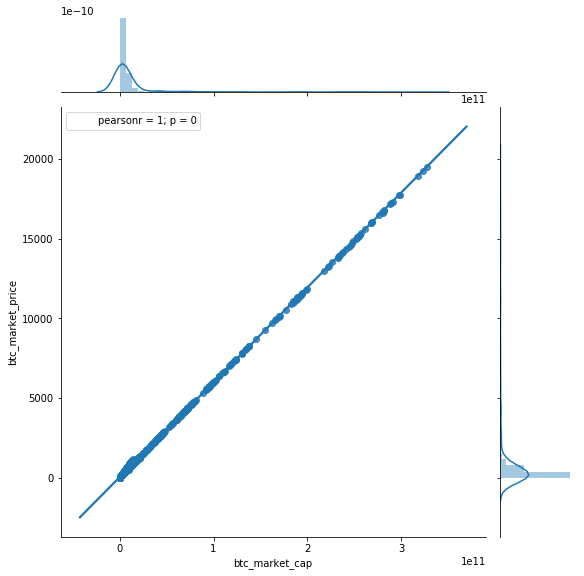

In [75]:
j=sns.jointplot(x='btc_market_cap',y='btc_market_price',kind="reg",data=data,height=8)
j.annotate(stats.pearsonr)
plt.show()

In [161]:
data1.mean()

btc_market_price                                       8.391042e+02
btc_total_bitcoins                                     1.151138e+07
btc_market_cap                                         1.344352e+10
btc_trade_volume                                       7.398381e+07
btc_blocks_size                                        3.550550e+04
btc_avg_block_size                                     3.503659e-01
btc_n_orphaned_blocks                                  3.640743e-01
btc_n_transactions_per_block                           6.716737e+02
btc_median_confirmation_time                           7.501113e+00
btc_hash_rate                                          1.244070e+06
btc_difficulty                                         1.606360e+11
btc_miners_revenue                                     2.184353e+06
btc_transaction_fees                                   6.043450e+01
btc_cost_per_transaction_percent                       6.674782e+01
btc_cost_per_transaction                        

In [162]:
data1.corr()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
btc_market_price,1.000000,0.392474,0.999783,0.868813,0.674507,0.544033,-0.076400,0.544125,0.275250,0.920876,...,-0.013517,0.815507,0.663917,0.569603,0.680048,0.558416,0.567281,0.111734,0.050894,0.968308
btc_total_bitcoins,0.392474,1.000000,0.384568,0.285815,0.779705,0.851554,0.274925,0.831414,0.668119,0.488668,...,-0.079864,0.372758,0.820595,0.832865,0.782652,0.814721,0.800405,0.290952,0.211814,0.387920
btc_market_cap,0.999783,0.384568,1.000000,0.869316,0.672863,0.541310,-0.080742,0.541702,0.271929,0.922073,...,-0.012923,0.805645,0.660720,0.566857,0.678081,0.555674,0.564791,0.112410,0.051356,0.968533
btc_trade_volume,0.868813,0.285815,0.869316,1.000000,0.521061,0.416060,-0.068798,0.430265,0.216617,0.758304,...,-0.009456,0.691630,0.539430,0.453644,0.525484,0.441964,0.449660,0.097722,0.056079,0.896016
btc_blocks_size,0.674507,0.779705,0.672863,0.521061,1.000000,0.955978,0.050864,0.946702,0.511763,0.826119,...,-0.030112,0.443102,0.966650,0.950189,0.999785,0.951959,0.961206,0.251049,0.152055,0.672394
btc_avg_block_size,0.544033,0.851554,0.541310,0.416060,0.955978,1.000000,0.147514,0.977887,0.555426,0.687581,...,-0.036717,0.335611,0.967663,0.977940,0.954478,0.976108,0.969182,0.296547,0.191663,0.553090
btc_n_orphaned_blocks,-0.076400,0.274925,-0.080742,-0.068798,0.050864,0.147514,1.000000,0.114178,0.071636,-0.092103,...,-0.015803,0.009497,0.122447,0.108167,0.054493,0.115909,0.073792,-0.006275,0.018300,-0.080944
btc_n_transactions_per_block,0.544125,0.831414,0.541702,0.430265,0.946702,0.977887,0.114178,1.000000,0.560052,0.670598,...,-0.036007,0.318210,0.966663,0.980739,0.945276,0.976423,0.975156,0.298024,0.188603,0.563285
btc_median_confirmation_time,0.275250,0.668119,0.271929,0.216617,0.511763,0.555426,0.071636,0.560052,1.000000,0.346172,...,-0.055222,0.178982,0.514264,0.545911,0.513363,0.510871,0.535190,0.308597,0.217121,0.281442
btc_hash_rate,0.920876,0.488668,0.922073,0.758304,0.826119,0.687581,-0.092103,0.670598,0.346172,1.000000,...,-0.015868,0.695143,0.769263,0.699357,0.829537,0.692128,0.712023,0.161671,0.081981,0.887864


In [78]:
data1.shape

(2906, 24)

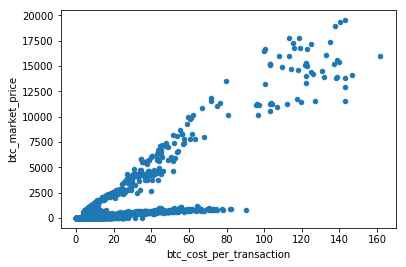

In [163]:
data1.plot(kind='scatter',x='btc_cost_per_transaction',y='btc_market_price')

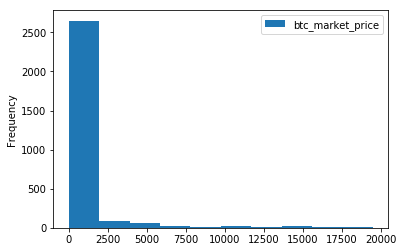

In [80]:
data1.plot(kind='hist',x='btc_n_transactions',y='btc_market_price')

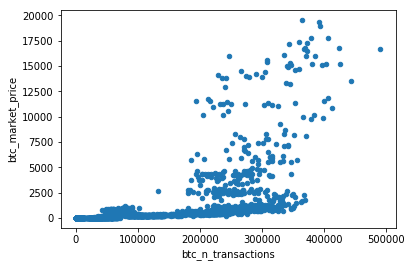

In [164]:
data1.plot(kind='scatter',x='btc_n_transactions',y='btc_market_price')

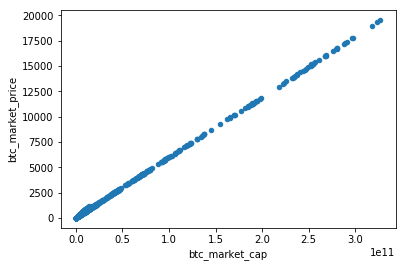

In [23]:
data1.plot(kind='scatter',x='btc_market_cap',y='btc_market_price')

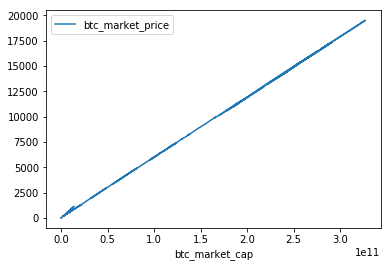

In [165]:
data1.plot(kind='line',x='btc_market_cap',y='btc_market_price')

In [166]:
market = pd.DataFrame(data1['btc_market_cap'])
price = pd.DataFrame(data1['btc_market_price'])

In [167]:
X = pd.DataFrame(data1['btc_market_cap'])
Y = pd.DataFrame(data1['btc_market_price'])

In [174]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(market,price)

In [175]:
#rom sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.2)

C:\Users\E.Manish\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [176]:
print(lm.score(X_train,Y_train))

0.9996131200712851


In [177]:
lm.intercept_

array([37.92774573])

In [178]:
lm.coef_

array([[5.95957143e-08]])

In [179]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [180]:
from sklearn.metrics import mean_squared_error

In [181]:
y_pred = lm.predict(X_test)

In [182]:
mean_squared_error(Y_test, y_pred)

2394.031244941128

In [120]:
import numpy as np
np.mean((Y_test-y_pred)**2)
print(lm.score(X_test,Y_))

btc_market_price    2366.34502
dtype: float64

In [145]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

IndexError: index 1 is out of bounds for axis 1 with size 1

In [125]:
X = np.array(data['btc_market_cap']).reshape(-1, 1) 
y = np.array(data['btc_market_price']).reshape(-1, 1)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [140]:
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

0.9994649802604958


In [141]:
y_pred = regr.predict(X_test)


In [142]:
mean_squared_error(y_test, y_pred)

2546.162149316752

In [184]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [187]:
#the other way
